# Import Library

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy import stats
from collections import Counter

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 10.0 MB/s eta 0:00:00


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Loading Dataset

In [4]:
ulasan_ig = pd.read_csv("https://raw.githubusercontent.com/umulsy/Sentimen-Analysis/refs/heads/main/ulasan_ig.csv")
ulasan_ig.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,3b426775-77ae-45af-94f9-93b42cab8c6c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi instagram ini sangat memuaskann. Ini ...,5,333,358.0.0.51.97,2024-11-25 02:32:25,NaN,NaN,358.0.0.51.97
1,1a2eb812-68f3-44b6-8ac0-13e1d9c9696b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah refresh terus, foto yg dilihat langsung ...",1,0,215.0.0.27.359,2021-12-09 18:48:35,NaN,NaN,215.0.0.27.359
2,3006c0ce-5fbf-4cac-b320-67c33e55cf20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah banyak bug. Di story tuli...,1,0,167.1.0.25.120,2023-11-26 16:09:49,NaN,NaN,167.1.0.25.120
3,6f4fe7d4-dd6a-4897-a5b9-936d8b6a69dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Banyak bug nya dan sampe sekarang belum diperb...,1,8,185.0.0.38.116,2021-05-01 21:57:15,NaN,NaN,185.0.0.38.116
4,8ab288e3-0f93-4936-b59a-c54f22f8c453,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Platform yg sepenuhnya visual. Tidak mirip Fac...,5,1323,356.0.0.41.101,2024-11-18 04:16:58,NaN,NaN,356.0.0.41.101


In [5]:
ulasan_ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              27000 non-null  object 
 1   userName              27000 non-null  object 
 2   userImage             27000 non-null  object 
 3   content               26999 non-null  object 
 4   score                 27000 non-null  int64  
 5   thumbsUpCount         27000 non-null  int64  
 6   reviewCreatedVersion  23244 non-null  object 
 7   at                    27000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            23244 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 2.3+ MB


### Data Cleaning

In [6]:
ulasan_ig.duplicated().sum()

0

In [7]:
ulasan_ig.isna().sum()

,0
reviewId,0
userName,0
userImage,0
content,1
score,0
thumbsUpCount,0
reviewCreatedVersion,3756
at,0
replyContent,27000
repliedAt,27000


In [8]:
# Pisahkan kolom 'at' menjadi 'review_date' dan 'review_time'
ulasan_ig['review_date'] = pd.to_datetime(ulasan_ig['at']).dt.date
ulasan_ig['review_time'] = pd.to_datetime(ulasan_ig['at']).dt.time

# Tampilkan hasilnya
print(ulasan_ig)

                                   reviewId         userName  \
0      3b426775-77ae-45af-94f9-93b42cab8c6c  Pengguna Google   
1      1a2eb812-68f3-44b6-8ac0-13e1d9c9696b  Pengguna Google   
2      3006c0ce-5fbf-4cac-b320-67c33e55cf20  Pengguna Google   
3      6f4fe7d4-dd6a-4897-a5b9-936d8b6a69dd  Pengguna Google   
4      8ab288e3-0f93-4936-b59a-c54f22f8c453  Pengguna Google   
...                                     ...              ...   
26995  093eec7f-c01f-414d-83e8-0e42ad67a801  Pengguna Google   
26996  2a54e177-1ab7-4137-94ac-3b93e35e90c0  Pengguna Google   
26997  3d6a7fc9-d2f2-486c-bf7a-5fd239aada25  Pengguna Google   
26998  d0a20770-c800-42f1-9338-438c5aab9b02  Pengguna Google   
26999  0158aa00-35f5-4cc2-b178-dd45ebaaec52  Pengguna Google   

                                               userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2N...   
1      https://play-lh.googleusercontent.com/EGemoI2N...   
2      https://play-lh.googleusercontent.com/EGemoI

In [9]:
ulasan_ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              27000 non-null  object 
 1   userName              27000 non-null  object 
 2   userImage             27000 non-null  object 
 3   content               26999 non-null  object 
 4   score                 27000 non-null  int64  
 5   thumbsUpCount         27000 non-null  int64  
 6   reviewCreatedVersion  23244 non-null  object 
 7   at                    27000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            23244 non-null  object 
 11  review_date           27000 non-null  object 
 12  review_time           27000 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 2.7+ MB


In [10]:
ulasan_ig = ulasan_ig.drop(['at', 'replyContent','repliedAt', 'reviewCreatedVersion'], axis=1)

In [11]:
ulasan_ig['review_date'] = pd.to_datetime(ulasan_ig['review_date'], format='%d-%m-%Y')

In [12]:
ulasan_ig['appVersion'] = ulasan_ig['appVersion'].str.replace(r'-release\.\d+$', '', regex=True)

print(ulasan_ig)

                                   reviewId         userName  \
0      3b426775-77ae-45af-94f9-93b42cab8c6c  Pengguna Google   
1      1a2eb812-68f3-44b6-8ac0-13e1d9c9696b  Pengguna Google   
2      3006c0ce-5fbf-4cac-b320-67c33e55cf20  Pengguna Google   
3      6f4fe7d4-dd6a-4897-a5b9-936d8b6a69dd  Pengguna Google   
4      8ab288e3-0f93-4936-b59a-c54f22f8c453  Pengguna Google   
...                                     ...              ...   
26995  093eec7f-c01f-414d-83e8-0e42ad67a801  Pengguna Google   
26996  2a54e177-1ab7-4137-94ac-3b93e35e90c0  Pengguna Google   
26997  3d6a7fc9-d2f2-486c-bf7a-5fd239aada25  Pengguna Google   
26998  d0a20770-c800-42f1-9338-438c5aab9b02  Pengguna Google   
26999  0158aa00-35f5-4cc2-b178-dd45ebaaec52  Pengguna Google   

                                               userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2N...   
1      https://play-lh.googleusercontent.com/EGemoI2N...   
2      https://play-lh.googleusercontent.com/EGemoI

Ide imputasi: nilai appVersion yang hilang akan diisi dengan modus dari appVersion dari tiga hari (hari itu, hari sebelumnya, dan hari sesudahnya)

In [13]:
# Fungsi untuk imputasi appVersion
def impute_app_version(row):
    # Ambil tanggal review
    review_date = row['review_date']

    # Cari modus appVersion pada hari itu, hari sebelumnya, dan hari sesudahnya
    combined_modes = pd.concat([
        ulasan_ig[ulasan_ig['review_date'] == pd.to_datetime(review_date)]['appVersion'],
        ulasan_ig[ulasan_ig['review_date'] == pd.to_datetime(review_date) - pd.Timedelta(days=1)]['appVersion'],
        ulasan_ig[ulasan_ig['review_date'] == pd.to_datetime(review_date) + pd.Timedelta(days=1)]['appVersion']
    ]).mode()

    # Jika modus ditemukan, kembalikan modus pertama
    if not combined_modes.empty:
        return combined_modes[0]
    else:
        return row['appVersion']

# Imputasi appVersion dengan fungsi yang dibuat
ulasan_ig['appVersion'] = ulasan_ig.apply(impute_app_version, axis=1)

print(f"Missing values in appVersion: {ulasan_ig['appVersion'].isnull().sum()}")

Missing values in appVersion: 0


In [14]:
ulasan_ig['appVersion'].value_counts().sort_index()

,count
appVersion,
10.8.0,6
100.0.0.17.129,52
101.0.0.15.120,29
102.0.0.20.117,34
103.1.0.15.119,33
...,...
95.0.0.21.124,39
96.0.0.28.114,24
97.0.0.32.119,41


In [15]:
ulasan_ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       27000 non-null  object        
 1   userName       27000 non-null  object        
 2   userImage      27000 non-null  object        
 3   content        26999 non-null  object        
 4   score          27000 non-null  int64         
 5   thumbsUpCount  27000 non-null  int64         
 6   appVersion     27000 non-null  object        
 7   review_date    27000 non-null  datetime64[ns]
 8   review_time    27000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.9+ MB


### Preprocessing

In [16]:
import nltk

# Before using word_tokenize, download the necessary data package
nltk.download('punkt_tab')

def cleaningText(text):
    if isinstance(text, str):
        text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
        text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
        text = re.sub(r'RT[\s]', '', text) # remove RT
        text = re.sub(r"http\S+", '', text) # remove link
        text = re.sub(r'[0-9]+', '', text) # remove numbers
        text = re.sub(r'[^\w\s]', '', text) # remove numbers


        text = text.replace('\n', ' ') # replace new line into space
        text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
        text = text.strip(' ') # remove characters space from both left and right text
    else :
        text = str(text)
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [17]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [18]:
ulasan_ig

,reviewId,userName,userImage,content,score,thumbsUpCount,appVersion,review_date,review_time
0,3b426775-77ae-45af-94f9-93b42cab8c6c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi instagram ini sangat memuaskann. Ini ...,5,333,358.0.0.51.97,2024-11-25,02:32:25
1,1a2eb812-68f3-44b6-8ac0-13e1d9c9696b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah refresh terus, foto yg dilihat langsung ...",1,0,215.0.0.27.359,2021-12-09,18:48:35
2,3006c0ce-5fbf-4cac-b320-67c33e55cf20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah banyak bug. Di story tuli...,1,0,309.0.0.40.113,2023-11-26,16:09:49
3,6f4fe7d4-dd6a-4897-a5b9-936d8b6a69dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Banyak bug nya dan sampe sekarang belum diperb...,1,8,185.0.0.38.116,2021-05-01,21:57:15
4,8ab288e3-0f93-4936-b59a-c54f22f8c453,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Platform yg sepenuhnya visual. Tidak mirip Fac...,5,1323,357.1.0.52.100,2024-11-18,04:16:58
...,...,...,...,...,...,...,...,...,...
26995,093eec7f-c01f-414d-83e8-0e42ad67a801,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Semua feed yg ada lagunya hilang, mau posting ...",1,0,301.1.0.33.110,2023-09-25,06:50:16
26996,2a54e177-1ab7-4137-94ac-3b93e35e90c0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tadi siang saya coba update app IG saya karna ...,4,0,137.0.0.34.123,2020-04-16,15:15:15
26997,3d6a7fc9-d2f2-486c-bf7a-5fd239aada25,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat² kecewa dengan fitur yang sekarang bias...,2,4,302.1.0.36.111,2023-10-01,07:41:56
26998,d0a20770-c800-42f1-9338-438c5aab9b02,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kemarin di update malah Instagram gabisa buat ...,2,0,287.0.0.25.77,2023-06-14,12:57:10


In [19]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
ulasan_ig['text_clean'] = ulasan_ig['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
ulasan_ig['text_casefoldingText'] = ulasan_ig['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
ulasan_ig['text_slangwords'] = ulasan_ig['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
ulasan_ig['text_tokenizingText'] = ulasan_ig['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
ulasan_ig['text_stopword'] = ulasan_ig['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
ulasan_ig['text_akhir'] = ulasan_ig['text_stopword'].apply(toSentence)

In [20]:
ulasan_ig

,reviewId,userName,userImage,content,score,thumbsUpCount,appVersion,review_date,review_time,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,3b426775-77ae-45af-94f9-93b42cab8c6c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi instagram ini sangat memuaskann. Ini ...,5,333,358.0.0.51.97,2024-11-25,02:32:25,aplikasi instagram ini sangat memuaskann Ini p...,aplikasi instagram ini sangat memuaskann ini p...,aplikasi instagram ini sangat memuaskann ini p...,"[aplikasi, instagram, ini, sangat, memuaskann,...","[aplikasi, instagram, memuaskann, penilaian, p...",aplikasi instagram memuaskann penilaian pribad...
1,1a2eb812-68f3-44b6-8ac0-13e1d9c9696b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah refresh terus, foto yg dilihat langsung ...",1,0,215.0.0.27.359,2021-12-09,18:48:35,Mudah refresh terus foto yg dilihat langsung h...,mudah refresh terus foto yg dilihat langsung h...,mudah refresh terus foto yang dilihat langsung...,"[mudah, refresh, terus, foto, yang, dilihat, l...","[mudah, refresh, foto, langsung, hilang, kebaw...",mudah refresh foto langsung hilang kebawah men...
2,3006c0ce-5fbf-4cac-b320-67c33e55cf20,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update malah banyak bug. Di story tuli...,1,0,309.0.0.40.113,2023-11-26,16:09:49,Setelah update malah banyak bug Di story tulis...,setelah update malah banyak bug di story tulis...,setelah update bahkan banyak bug di story tuli...,"[setelah, update, bahkan, banyak, bug, di, sto...","[update, bug, story, tulisan, musik, temukan, ...",update bug story tulisan musik temukan story o...
3,6f4fe7d4-dd6a-4897-a5b9-936d8b6a69dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Banyak bug nya dan sampe sekarang belum diperb...,1,8,185.0.0.38.116,2021-05-01,21:57:15,Banyak bug nya dan sampe sekarang belum diperb...,banyak bug nya dan sampe sekarang belum diperb...,banyak bug nya dan sampai sekarang belum diper...,"[banyak, bug, nya, dan, sampai, sekarang, belu...","[bug, diperbaiki, udh, report, cs, perubahan, ...",bug diperbaiki udh report cs perubahan bug tem...
4,8ab288e3-0f93-4936-b59a-c54f22f8c453,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Platform yg sepenuhnya visual. Tidak mirip Fac...,5,1323,357.1.0.52.100,2024-11-18,04:16:58,Platform yg sepenuhnya visual Tidak mirip Face...,platform yg sepenuhnya visual tidak mirip face...,platform yang sepenuhnya visual tidak mirip fa...,"[platform, yang, sepenuhnya, visual, tidak, mi...","[platform, sepenuhnya, visual, facebook, menga...",platform sepenuhnya visual facebook mengandalk...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,093eec7f-c01f-414d-83e8-0e42ad67a801,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Semua feed yg ada lagunya hilang, mau posting ...",1,0,301.1.0.33.110,2023-09-25,06:50:16,Semua feed yg ada lagunya hilang mau posting s...,semua feed yg ada lagunya hilang mau posting s...,semua feed yang ada lagunya hilang mau posting...,"[semua, feed, yang, ada, lagunya, hilang, mau,...","[feed, lagunya, hilang, posting, story, laguny...",feed lagunya hilang posting story lagunya dite...
26996,2a54e177-1ab7-4137-94ac-3b93e35e90c0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tadi siang saya coba update app IG saya karna ...,4,0,137.0.0.34.123,2020-04-16,15:15:15,Tadi siang saya coba update app IG saya karna ...,tadi siang saya coba update app ig saya karna ...,tadi siang saya coba update app ig saya karena...,"[tadi, siang, saya, coba, update, app, ig, say...","[siang, coba, update, app, ig, kendala, postin...",siang coba update app ig kendala posting igs u...
26997,3d6a7fc9-d2f2-486c-bf7a-5fd239aada25,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat² kecewa dengan fitur yang sekarang bias...,2,4,302.1.0.36.111,2023-10-01,07:41:56,Sangat² kecewa dengan fitur yang sekarang bias...,s

### Pelabelan

In [21]:
pip install requests

In [22]:
pip install csv

ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [23]:
import requests
import csv
from io import StringIO

# kamus untuk kata-kata positif
positive_dictionary = dict()

# import kamus positif dari github, credit to the owner: angelmetanosaa
res = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

# logika jika data tidak dapat diambil
if res.status_code == 200:
    reader = csv.reader(StringIO(res.text), delimiter=',')

    # menambahkan kata-kata positif dan skor ke dalam positive_dictionary
    for row in reader:
        positive_dictionary[row[0]] = int(row[1])

else:
    print('Unable to fetch positive lexicon data')

# kamus untuk kata-kata negatif
negative_dictionary = dict()

# import kamus negatif dari github, credit to the owner: angelmetanosaa
res = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

# logika jika data tidak dapat diambil
if res.status_code == 200:
    reader = csv.reader(StringIO(res.text), delimiter=',')

    # menambahkan kata-kata negatif dan skor ke dalam negative_dictionary
    for row in reader:
        negative_dictionary[row[0]] = int(row[1])

else:
    print('Unable to fetch negative lexicon data')

In [24]:
# Fungsi untuk menentukan polaritas sentimen dari data review shopee
def analysis_sentiment(words):
    score = 0;

    # loop untuk mencari setiap kata pada setiap kalimat
    for word in words:

        # jika kata tersebut terdapat di dalam positive_dictionary maka score akan ditambah
        # sesuai dengan nilai pada positive_dictionary
        if(word in positive_dictionary):
            score = score + positive_dictionary[word]

        # jika kata tersebut terdapat di dalam negative_dictionary maka score akan ditambah
        # sesuai dengan nilai pada negative_dictionary
        if(word in negative_dictionary):
            score = score + negative_dictionary[word]

    # deklarasi variabel polarity untuk sebagai wadah nilai pada score
    polarity = 0

    # logika score untuk menentukan nilai polarity
    if (score > 0):
        polarity = 2 # Positive
    elif(score < 0 ):
        polarity = 0 # Negative
    else:
        polarity = 1 # Netral


    return polarity, score

In [25]:
result = ulasan_ig['text_stopword'].apply(analysis_sentiment)
result = list(zip(*result))

ulasan_ig['polarity'] = result[0]
ulasan_ig['polarity_score'] = result[1]

# Tampilkan nilai hitung untuk setiap kategori polaritas dengan keterangan
print("Distribusi Sentimen:")
print(ulasan_ig['polarity'].value_counts().rename({2: 'Positif', 0: 'Negatif', 1: 'Netral'}))

Distribusi Sentimen:
polarity
Negatif    13877
Positif    10564
Netral      2559
Name: count, dtype: int64


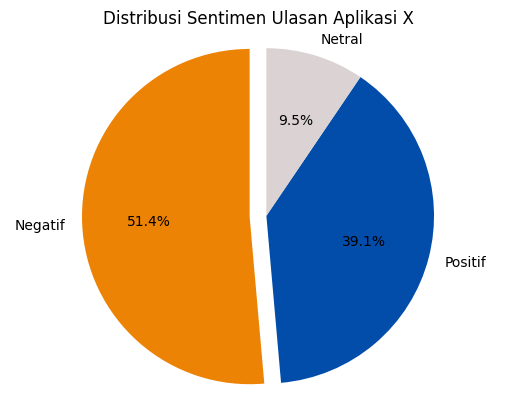

In [26]:
# Menghitung jumlah setiap kategori sentimen
sentimen_counts = ulasan_ig['polarity'].value_counts().rename({2: 'Positif', 0: 'Negatif', 1: 'Netral'})

# Buat pie chart
colors = ['#EC8305', '#024CAA', '#DBD3D3']
explode = (0.1, 0, 0)

plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Distribusi Sentimen Ulasan Aplikasi X')
plt.axis('equal')
plt.show()

In [27]:
# Mengatur opsi tampilan Pandas
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru untuk tweet positif dan mengurutkannya
positive_tweets = ulasan_ig[ulasan_ig['polarity'] == 'positive'] \
                   .sort_values('polarity_score', ascending=False) \
                   [['text_akhir', 'polarity_score', 'polarity', 'text_stopword']] \
                   .reset_index(drop=True)

# Menambahkan 1 ke indeks
positive_tweets.index += 1

In [28]:
# Membuat DataFrame untuk tweet negatif
negative_tweets = ulasan_ig[ulasan_ig['polarity'] == 'negative'] \
                   .sort_values('polarity_score') \
                   [['text_akhir', 'polarity_score', 'polarity', 'text_stopword']] \
                   .reset_index(drop=True)
negative_tweets.index += 1

In [29]:
# Membuat DataFrame untuk tweet netral
neutral_tweets = ulasan_ig[ulasan_ig['polarity'] == 'neutral'] \
                   [['text_akhir', 'polarity_score', 'polarity', 'text_stopword']] \
                   .reset_index(drop=True)
neutral_tweets.index += 1

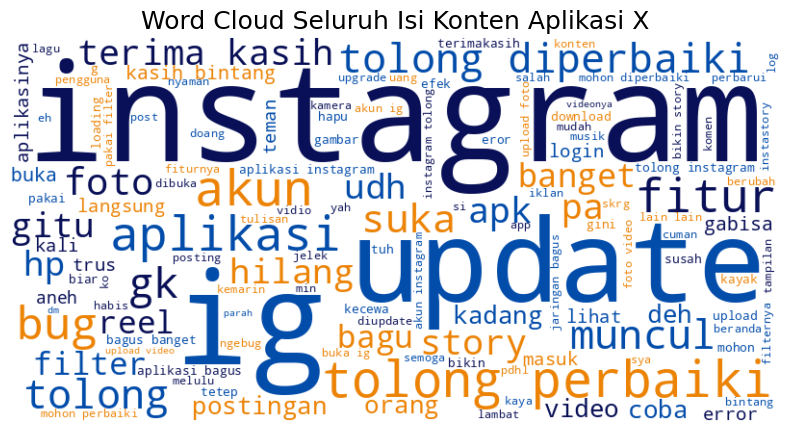

In [30]:
from wordcloud import WordCloud
import random

# Warna pilihan
colors = ['#EC8305', '#024CAA', '#091057']

# Fungsi untuk memilih warna acak dari daftar warna
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    return random.choice(colors)

# Pastikan setiap elemen dalam 'text_stopword' adalah string
ulasan_ig['text_stopword'] = ulasan_ig['text_stopword'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Menggabungkan semua kata dalam kolom 'text_stopword' menjadi satu string
all_words = ' '.join(ulasan_ig['text_stopword'])

# Membuat objek WordCloud dengan fungsi warna
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10, color_func=random_color_func).generate(all_words)

# Membuat plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Seluruh Isi Konten Aplikasi X', fontsize=18)
plt.show()


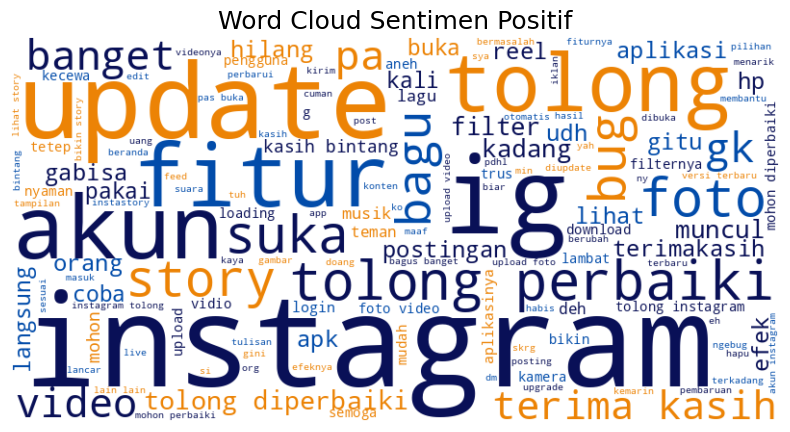

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Warna pilihan
colors = ['#EC8305', '#024CAA', '#091057']

# Fungsi untuk memilih warna acak dari daftar warna
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    return random.choice(colors)

# Fungsi untuk membuat WordCloud dengan warna khusus
def generate_wordcloud(df, sentiment_label, title):
    # Filter data berdasarkan label sentimen
    text_data = ' '.join(df[df['polarity'] == sentiment_label]['text_stopword'])

    # Membuat objek WordCloud dengan color_func
    wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10, color_func=random_color_func).generate(text_data)

    # Plot WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

# Membuat WordCloud untuk setiap kategori sentimen dengan warna khusus
generate_wordcloud(ulasan_ig, 2, 'Word Cloud Sentimen Positif')   # Positif


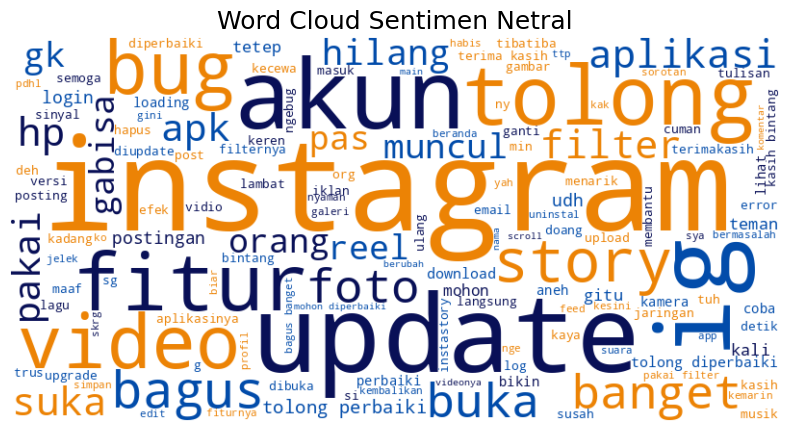

In [32]:
generate_wordcloud(ulasan_ig, 1, 'Word Cloud Sentimen Netral')    # Netral

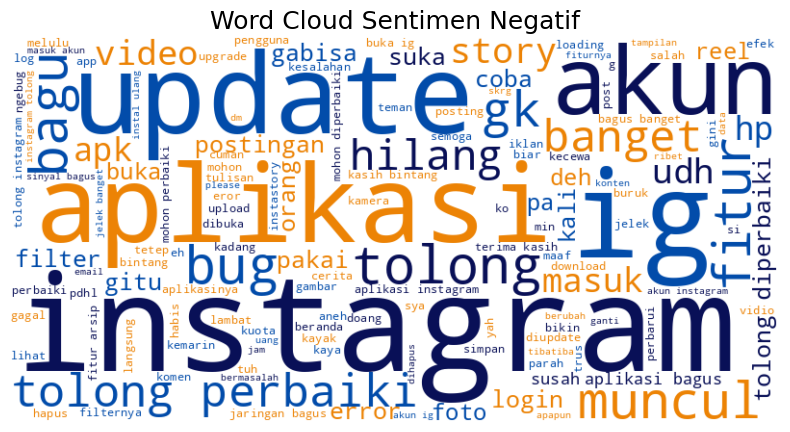

In [33]:
generate_wordcloud(ulasan_ig, 0, 'Word Cloud Sentimen Negatif')   # Negatif

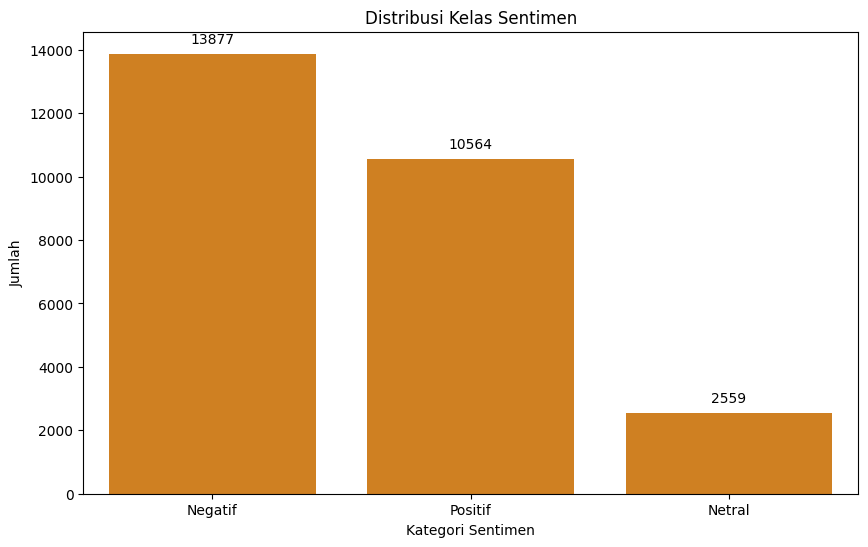

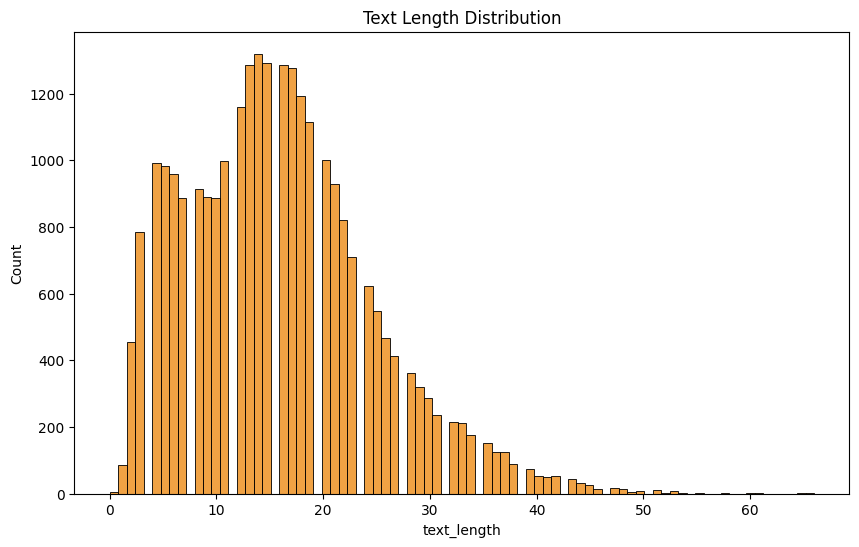

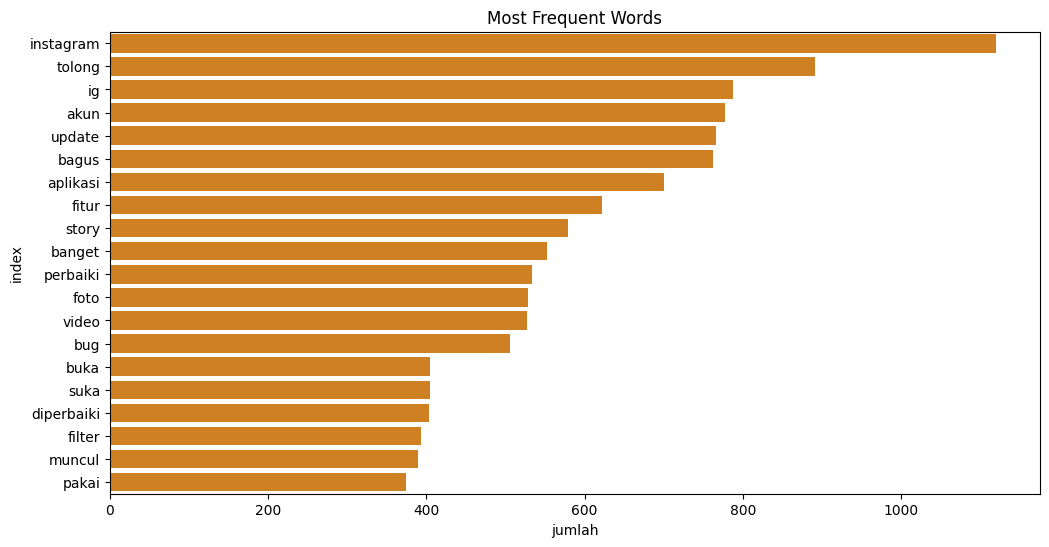

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Set ukuran figure dan warna untuk konsistensi
color = "#EC8305"

# Plot distribusi kelas
plt.figure(figsize=(10, 6))
ulasan_ig['sentimen_label'] = ulasan_ig['polarity'].replace({2: 'Positif', 0: 'Negatif', 1: 'Netral'})
class_dist_plot = sns.countplot(x='sentimen_label', data=ulasan_ig, color=color)
plt.title('Distribusi Kelas Sentimen')

# Menambahkan jumlah di atas setiap bar
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')

plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Plot distribusi panjang teks
plt.figure(figsize=(10, 6))
ulasan_ig['text_length'] = ulasan_ig['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(ulasan_ig['text_length'], color=color)
plt.title('Text Length Distribution')
plt.show()

# Plot kata yang paling sering muncul
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(ulasan_ig['text_akhir'])

# Konversi hasil TF-IDF ke DataFrame dan hitung jumlah setiap kata
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)

sns.barplot(x='jumlah', y='index', data=tfidf_df, color=color)
plt.title('Most Frequent Words')
plt.show()

### Data Splitting

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
X = ulasan_ig['text_akhir']
y = ulasan_ig['polarity']

In [37]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [38]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,akun,android,aneh,apapun,apk,aplikasi,aplikasinya,app,arsip,bagus,...,uninstall,update,upgrade,upload,versi,video,videonya,vidio,wifi,yah
0,0.000000,0.0,0.0,0.000000,0.0,0.152497,0.0,0.000000,0.0,0.145613,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.194911,0.0,0.157898,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.205679,0.229182,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.099354,0.0,0.0,0.191281,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.092861,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.319665,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
26996,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.390389,0.0,0.000000,...,0.000000,0.390602,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
26997,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.313988,0.0,0.0,0.0,0.0
26998,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.160246,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [55]:
# Bagi data menjadi data latih dan data uji
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)

print('Train Data Shape: ', X_train.shape, y_train.shape)
print('Test Data Shape: ', X_test.shape, y_test.shape)

Train Data Shape:  (21600,) (21600,)
Test Data Shape:  (5400,) (5400,)


## Pemodelan dengan 3 Algoritma

### 1. Model Logistik Regression

In [57]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train1, y_train1)
y_pred_logistic = logistic_model.predict(X_test1)

logistic_accuracy = accuracy_score(y_test1, y_pred_logistic)
print("Logistic Regression:")
print("Accuracy:", logistic_accuracy)
print(classification_report(y_test1, y_pred_logistic))

Logistic Regression:
Accuracy: 0.7587037037037037
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2772
           1       0.51      0.16      0.24       515
           2       0.74      0.78      0.76      2113

    accuracy                           0.76      5400
   macro avg       0.68      0.60      0.61      5400
weighted avg       0.74      0.76      0.74      5400



### 2. Model XGBoost

In [58]:
from xgboost import XGBClassifier

# Model 2 : XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train1, y_train1)
y_pred_xgb = xgb_model.predict(X_test1)

xgb_accuracy = accuracy_score(y_test1, y_pred_xgb)
print("XGBoost:")
print("Accuracy:", xgb_accuracy)
print(classification_report(y_test1, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
Accuracy: 0.7520370370370371
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2772
           1       0.59      0.17      0.26       515
           2       0.71      0.79      0.75      2113

    accuracy                           0.75      5400
   macro avg       0.70      0.60      0.61      5400
weighted avg       0.74      0.75      0.73      5400



In [43]:
!pip install tensorflow
!pip install keras

### 3. Deep Learning

In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalAveragePooling1D
from keras.optimizers import Adam
from sklearn.metrics import classification_report

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.87 and logs.get('val_accuracy')>0.87):
            print("\nHentikan Training ketika sudah memenuhi target.")
            self.model.stop_training = True

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and Padding
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Model Building
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    GlobalAveragePooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: negative, neutral, positive
])


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Training
history = model.fit(X_train_pad, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32,
                    callbacks=[CustomCallback()],
                    verbose=1)

# Evaluation
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes, target_names=['negative', 'neutral', 'positive']))


Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 200s 365ms/step - accuracy: 0.4900 - loss: 0.9578 - val_accuracy: 0.5178 - val_loss: 0.9310
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 196s 354ms/step - accuracy: 0.6777 - loss: 0.8145 - val_accuracy: 0.7690 - val_loss: 0.6156
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 200s 351ms/step - accuracy: 0.8231 - loss: 0.4915 - val_accuracy: 0.8488 - val_loss: 0.4159
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 192s 355ms/step - accuracy: 0.8939 - loss: 0.3052 - val_accuracy: 0.8613 - val_loss: 0.3943
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 199s 350ms/step - accuracy: 0.9196 - loss: 0.2306 - val_accuracy: 0.8694 - val_loss: 0.4143
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.9449 - loss: 0.1623
Hentikan Training ketika sudah memenuhi target.
540/540 ━━━━━━━━━━━━━━━━━━━━ 191s 354ms/step - accuracy: 0.9449 - loss: 0.1623 - val_accuracy: 0.8762 - val_loss: 0.4113
169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step
              precision    recall  f1-s

In [52]:
# Akurasi model
accuracy_lstm = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy_lstm)

Accuracy: 0.8711111111111111


### 4. Model Naive Bayes

In [56]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB( alpha=0.8)

# Melatih model Naive Bayes pada data pelatihan
# Removed .toarray() as X_train is already a dense array
naive_bayes.fit(X_train1, y_train1)

# Prediksi sentimen pada data pelatihan dan data uji
# Removed .toarray() as X_train is already a dense array
y_pred_train_nb = naive_bayes.predict(X_train1)
# Removed .toarray() as X_test is already a dense array
y_pred_test_nb = naive_bayes.predict(X_test1)

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7085648148148148
Naive Bayes - accuracy_test: 0.7012962962962963


### 5. Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train1, y_train1)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train1)
y_pred_test_rf = random_forest.predict(X_test1)

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train1)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test1)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9710185185185185
Random Forest - accuracy_test: 0.7335185185185186


In [60]:
# Mengurutkan hasil akurasi dari ketiga model
model_accuracies = {
    "Logistic Regression": logistic_accuracy,
    "XGBoost": xgb_accuracy,
    "LSTM": accuracy_lstm,
    "Naive Bayes": accuracy_test_nb,
    "Random Forest": accuracy_test_rf,
}

# Urutkan berdasarkan nilai akurasi secara menurun
sorted_accuracies = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)

print("\nModel Accuracies in Descending Order:")
for model_name, accuracy in sorted_accuracies:
    print(f"{model_name}: {accuracy:.4f}")


Model Accuracies in Descending Order:
LSTM: 0.8711
Logistic Regression: 0.7587
XGBoost: 0.7520
Random Forest: 0.7335
Naive Bayes: 0.7013


Dari 6 model yang kita coba, yang menghasilkan akurasi tinggi adalah Logistic Regression

## Testing

In [63]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Konversi data ke format array untuk digunakan oleh model RNN
X_kalimat_baru_array = X_kalimat_baru.toarray()

# Memperoleh prediksi sentimen kalimat baru menggunakan model RNN
prediksi_sentimen = model.predict(X_kalimat_baru_array)
prediksi_sentimen_label = prediksi_sentimen.argmax(axis=1)[0]

# Menentukan label sentimen berdasarkan prediksi
if prediksi_sentimen_label == 2:
    hasil_sentimen = "Positif"
elif prediksi_sentimen_label == 0:
    hasil_sentimen = "Negatif"
else:
    hasil_sentimen = "Netral"

# Menampilkan hasil prediksi sentimen
print(f"Hasil Klasifikasi Sentimen: {hasil_sentimen}")


Masukkan kalimat baru: instagram ok
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
Hasil Klasifikasi Sentimen: Netral
